# Capstone Data clean-up and EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import datetime as dt
from jupyterthemes import jtplot

jtplot.style()

In [2]:
beatles = pd.read_csv('beatles_precision.csv')

In [3]:
beatles.head()

,Unnamed: 0,song,artist,album,duration,track_num,release_date,popularity,danceability,energy,key,key_confidence,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Love Me Do - Mono / Remastered,The Beatles,1 (Remastered),140173,1,2000-11-13,57,0.524,0.880,0,0.563,1,0.0987,0.404,0.000191,0.154,0.758,148.058
1,1,From Me To You - Mono / Remastered,The Beatles,1 (Remastered),116160,2,2000-11-13,59,0.581,0.821,0,0.000,1,0.0318,0.507,0.000000,0.108,0.968,136.145
2,2,She Loves You - Mono / Remastered,The Beatles,1 (Remastered),140920,3,2000-11-13,66,0.377,0.916,4,0.000,0,0.0481,0.260,0.000000,0.074,0.912,75.533
3,3,I Want To Hold Your Hand - Remastered 2015,The Beatles,1 (Remastered),145746,4,2000-11-13,71,0.490,0.715,7,0.560,1,0.0476,0.386,0.000000,0.311,0.866,130.726
4,4,Can't Buy Me Love - Remastered 2015,The Beatles,1 (Remastered),131213,5,2000-11-13,56,0.426,0.760,0,0.712,1,0.0414,0.118,0.000000,0.325,0.955,171.838


#### data cleaning

In [4]:
## remove pesky 'remastered' bits from album and song titles
beatles['song'] = beatles['song'].str.replace(r' - [a-zA-Z]+ \d+', '', regex=True)

In [5]:
beatles['song'] = beatles['song'].str.replace(' - Mono / Remastered', '')

In [6]:
beatles['album'] = beatles['album'].str.replace('(Remastered)', '')

In [7]:
beatles['album'] = beatles['album'].str[:-3]

In [8]:
## remove duplicates from the lone greatist hits that has important non-LP tracks
len(beatles)

220

In [9]:
beatles.drop_duplicates(subset='song', keep = 'last', inplace = True)

In [10]:
len(beatles)

201

In [11]:
beatles.loc[beatles.song == 'Yellow Submarine']

,Unnamed: 0,song,artist,album,duration,track_num,release_date,popularity,danceability,energy,key,key_confidence,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
128,128,Yellow Submarine,The Beatles,Revolver,158880,6,1966-08-05,63,0.604,0.549,1,0.738,1,0.0389,0.531,0.0,0.438,0.696,111.398


In [15]:
## remove George Martin credited tracks
beatles = beatles.drop(beatles[beatles.artist == 'George Martin'].index)

In [17]:
## Change release_date to year, as precise date is not too relevant
beatles['release_date'] = pd.to_datetime(beatles['release_date'])

In [18]:
beatles['release_date'] = beatles['release_date'].dt.year

In [19]:
beatles.head()

,Unnamed: 0,song,artist,album,duration,track_num,release_date,popularity,danceability,energy,key,key_confidence,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,1,From Me To You,The Beatles,1,116160,2,2000,59,0.581,0.821,0,0.000,1,0.0318,0.5070,0.000000,0.108,0.968,136.145
2,2,She Loves You,The Beatles,1,140920,3,2000,66,0.377,0.916,4,0.000,0,0.0481,0.2600,0.000000,0.074,0.912,75.533
3,3,I Want To Hold Your Hand,The Beatles,1,145746,4,2000,71,0.490,0.715,7,0.560,1,0.0476,0.3860,0.000000,0.311,0.866,130.726
6,6,I Feel Fine,The Beatles,1,139346,7,2000,63,0.564,0.827,7,1.000,1,0.0283,0.0904,0.000004,0.127,0.912,89.847
11,11,Day Tripper,The Beatles,1,169000,12,2000,64,0.665,0.782,6,0.521,0,0.0307,0.1200,0.000004,0.125,0.731,137.453


In [139]:
## Dictonary to plot keys and modes

key_dict = {
    0: "C",
    1: "Db",
    2: "D",
    3: "Eb",
    4: "E",
    5: "F",
    6: "F#",
    7: "G",
    8: "Ab",
    9: "A",
    10: "Bb",
    11: "B"
}

mode_dict = {
    0: "Minor",
    1: "Major"
}

In [ ]:
## change duration from ms to mm:ss format

In [53]:
credits = pd.read_csv('credits.csv')

In [54]:
## convert all titles to uppercase to allow for more accurate matching keys
beatles.song = beatles.song.str.upper()
credits.Song = credits.Song.str.upper()

In [61]:
merge = pd.merge(beatles, credits,
                left_on='song', right_on='Song',
                how='left')

In [65]:
merge.to_csv("merge.csv", sep = ',')

In [66]:
## export merge to excel for some pesky changes, i.e. capturing a few unsuccessful joins and
## correcting dates from greatist hits

In [67]:
beatles_new = pd.read_csv('../data/merge_revised.csv')

In [68]:
beatles_new

,Unnamed: 0,song,artist,album,duration,track_num,release_date,popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Song,Main composer,Singer
0,0,FROM ME TO YOU,The Beatles,1,116160,2,1963,59,0.581,0.821,...,1,0.0318,0.5070,0.000000,0.1080,0.968,136.145,FROM ME TO YOU,Lennon/McCartney,Lennon/McCartney
1,1,SHE LOVES YOU,The Beatles,1,140920,3,1963,66,0.377,0.916,...,0,0.0481,0.2600,0.000000,0.0740,0.912,75.533,SHE LOVES YOU,Lennon/McCartney,Lennon/McCartney
2,2,I WANT TO HOLD YOUR HAND,The Beatles,1,145746,4,1963,71,0.490,0.715,...,1,0.0476,0.3860,0.000000,0.3110,0.866,130.726,I WANT TO HOLD YOUR HAND,Lennon/McCartney,Lennon/McCartney
3,3,I FEEL FINE,The Beatles,1,139346,7,1964,63,0.564,0.827,...,1,0.0283,0.0904,0.000004,0.1270,0.912,89.847,I FEEL FINE,Lennon,Lennon
4,4,DAY TRIPPER,The Beatles,1,169000,12,1965,64,0.665,0.782,...,0,0.0307,0.1200,0.000004,0.1250,0.731,137.453,DAY TRIPPER,Lennon,Lennon/McCartney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,BABY IT'S YOU,The Beatles,Please Please Me,160520,10,1963,58,0.608,0.494,...,0,0.0345,0.7780,0.000000,0.0926,0.879,112.421,BABY IT'S YOU,David/Williams/Bacharach,Lennon
190,191,DO YOU WANT TO KNOW A SECRET,The Beatles,Please Please Me,117013,11,1963,61,0.673,0.349,...,1,0.0368,0.6080,0.000000,0.3800,0.609,124.451,DO YOU WANT TO KNOW A SECRET,Lennon,Harrison
191,192,A TASTE OF HONEY,The Beatles,Please Please Me,123480,12,1963,48,0.420,0.372,...,0,0.0327,0.6980,0.000000,0.1040,0.412,101.408,A TASTE OF HONEY,Scott/Marlow,McCartney
192,193,THERE'S A PLACE,The Beatles,Please Please Me,110493,13,1963,48,0.455,0.582,...,1,0.0292,0.6290,0.000004,0.1720,0.927,140.928,THERE'S A PLACE,Lennon,Lennon


In [81]:
## using composite of Main composer and singer, we will assign lead to whoever the greatest singular contributer is
for ind, row in beatles_new.iterrows():
    if (row['Singer'] != 'Lennon' and row['Singer'] != 'McCartney' and row['Singer'] != 'Starr' and row['Singer'] != 'Harrison'):
        beatles_new.loc[ind, 'lead'] = row['Main composer']
    else:
        beatles_new.loc[ind, 'lead'] = row['Singer']

In [110]:
## last few clean-ups and corrections:
beatles_new.lead[175] = 'Lennon'
beatles_new.lead[16] = 'Lennon/McCartney'
beatles_new.lead[75] = 'Lennon/McCartney'

<ipython-input-110-ff9b161767e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beatles_new.lead[175] = 'Lennon'
<ipython-input-110-ff9b161767e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beatles_new.lead[16] = 'Lennon/McCartney'
<ipython-input-110-ff9b161767e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beatles_new.lead[75] = 'Lennon/McCartney'


In [111]:
beatles_new.lead.value_counts()

Lennon              76
McCartney           69
Harrison            26
Lennon/McCartney    13
Starr               10
Name: lead, dtype: int64

In [117]:
beatles_new.groupby('lead')['popularity'].mean()

lead
Harrison            54.269231
Lennon              56.263158
Lennon/McCartney    55.692308
McCartney           59.318841
Starr               52.700000
Name: popularity, dtype: float64

In [145]:
beatles_new = beatles_new.replace({"key": key_dict, "mode": mode_dict})

#### Solo career cleaning

In [91]:
solo_career = pd.read_csv('solo_beatles.csv')

In [93]:
solo_career.artist.value_counts()

Ringo Starr        166
Paul McCartney     148
George Harrison    125
Wings               82
John Lennon         78
Yoko Ono            10
Name: artist, dtype: int64

In [95]:
for ind, row in solo_career.iterrows():
    if (row['artist'] == 'Paul McCartney' or row['artist'] == 'Wings'):
        solo_career.loc[ind, 'lead'] = 'McCartney'
    elif (row['artist'] == 'John Lennon' or row['artist'] == 'Yoko One'):
        solo_career.loc[ind, 'lead'] = 'Lennon'
    elif row['artist'] == 'George Harrison':
        solo_career.loc[ind, 'lead'] = 'Harrison'
    else:
        solo_career.loc[ind, 'lead'] = 'Starr'

In [114]:
solo_career['release_date'] = pd.to_datetime(solo_career['release_date'])
solo_career['release_date'] = solo_career['release_date'].dt.year
solo_career.head(2)

,Unnamed: 0,song,artist,album,duration,track_num,release_date,popularity,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lead
0,0,Dance Tonight,Paul McCartney,Memory Almost Full,174933,1,2007,38,0.531,0.891,5,1,0.0431,0.0823,0.00551,0.161,0.926,170.973,McCartney
1,1,Ever Present Past,Paul McCartney,Memory Almost Full,176293,2,2007,23,0.691,0.755,0,1,0.0354,0.0293,0.00000,0.251,0.904,127.961,McCartney


In [144]:
solo_career = solo_career.replace({"key": key_dict, "mode": mode_dict})

In [146]:
band_solo_full_comparison = pd.concat([beatles_new, solo_career], join='inner')

In [116]:
band_solo_full_comparison.lead.value_counts()

McCartney           299
Starr               186
Lennon              154
Harrison            151
Lennon/McCartney     13
Name: lead, dtype: int64

In [147]:
band_solo_full_comparison.head(2)

,Unnamed: 0,song,artist,album,duration,track_num,release_date,popularity,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lead
0,0,FROM ME TO YOU,The Beatles,1,116160,2,1963,59,0.581,0.821,C,Major,0.0318,0.507,0.0,0.108,0.968,136.145,Lennon/McCartney
1,1,SHE LOVES YOU,The Beatles,1,140920,3,1963,66,0.377,0.916,E,Minor,0.0481,0.260,0.0,0.074,0.912,75.533,Lennon/McCartney


In [125]:
band_solo_full_comparison.groupby('lead')['popularity'].mean()

lead
Harrison            25.397351
Lennon              47.240260
Lennon/McCartney    55.692308
McCartney           32.347826
Starr               12.408602
Name: popularity, dtype: float64

#### Contemporary group cleanings

In [126]:
peer_groups = pd.read_csv('peer_groups.csv')
peer_groups.head(2)

,Unnamed: 0,song,artist,album,duration,track_num,release_date,popularity,danceability,energy,key,key_confidence,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Rocks Off,The Rolling Stones,Exile On Main Street (2010 Re-Mastered),271933,1,1972-05-12,54,0.485,0.943,4,0.464,1,0.0416,0.0639,0.179,0.144,0.889,141.982
1,1,Rip This Joint,The Rolling Stones,Exile On Main Street (2010 Re-Mastered),143293,2,1972-05-12,46,0.548,0.952,2,0.809,1,0.0422,0.1180,0.837,0.301,0.906,98.040


In [127]:
peer_groups['release_date'] = pd.to_datetime(peer_groups['release_date'])
peer_groups['release_date'] = peer_groups['release_date'].dt.year

,Unnamed: 0,song,artist,album,duration,track_num,release_date,popularity,danceability,energy,key,key_confidence,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Rocks Off,The Rolling Stones,Exile On Main Street (2010 Re-Mastered),271933,1,1972,54,0.485,0.943,4,0.464,1,0.0416,0.0639,0.179,0.144,0.889,141.982
1,1,Rip This Joint,The Rolling Stones,Exile On Main Street (2010 Re-Mastered),143293,2,1972,46,0.548,0.952,2,0.809,1,0.0422,0.1180,0.837,0.301,0.906,98.040


In [148]:
peer_groups = peer_groups.replace({"key": key_dict, "mode": mode_dict})

In [149]:
beatles_and_peers_comparison = pd.concat([beatles_new, peer_groups], join='inner')
beatles_and_peers_comparison

,Unnamed: 0,song,artist,album,duration,track_num,release_date,popularity,danceability,energy,key,key_confidence,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,FROM ME TO YOU,The Beatles,1,116160,2,1963,59,0.581,0.821,C,0.000,Major,0.0318,0.5070,0.000000,0.1080,0.968,136.145
1,1,SHE LOVES YOU,The Beatles,1,140920,3,1963,66,0.377,0.916,E,0.000,Minor,0.0481,0.2600,0.000000,0.0740,0.912,75.533
2,2,I WANT TO HOLD YOUR HAND,The Beatles,1,145746,4,1963,71,0.490,0.715,G,0.560,Major,0.0476,0.3860,0.000000,0.3110,0.866,130.726
3,3,I FEEL FINE,The Beatles,1,139346,7,1964,63,0.564,0.827,G,1.000,Major,0.0283,0.0904,0.000004,0.1270,0.912,89.847
4,4,DAY TRIPPER,The Beatles,1,169000,12,1965,64,0.665,0.782,F#,0.521,Minor,0.0307,0.1200,0.000004,0.1250,0.731,137.453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,627,I Gotta Go Now,The Kinks,Kinks,173226,22,1964,22,0.571,0.514,A,0.365,Major,0.0481,0.2270,0.000010,0.0709,0.651,106.363
628,628,Things Are Getting Better,The Kinks,Kinks,114600,23,1964,21,0.559,0.869,D,0.443,Major,0.1020,0.1890,0.000000,0.0716,0.451,118.696
629,629,I've Got That Feeling,The Kinks,Kinks,162600,24,1964,24,0.574,0.763,F#,0.016,Minor,0.0389,0.1870,0.000000,0.0892,0.852,127.698
630,630,Too Much Monkey Business - Alternate Take,The Kinks,Kinks,127893,25,1964,20,0.562,0.878,F,0.451,Major,0.1470,0.0213,0.000000,0.3690,0.958,117.194


artist
The Beach Boys        0.537085
The Beatles           0.539706
The Kinks             0.550868
The Rolling Stones    0.639519
Name: key_confidence, dtype: float64

#### Final dataframe exports

In [150]:
#beatles_new.to_csv("beatles_final.csv", sep = ',')
#band_solo_full_comparison.to_csv("band_solo_final.csv", sep = ',')
#beatles_and_peers_comparison.to_csv("band_peers_final.csv", sep = ',')

In [16]:
beatles_final = pd.read_csv('../data/beatles_final.csv')

In [17]:
beatles_final.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'song', 'artist', 'album', 'duration',
       'track_num', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'key_confidence', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'Song',
       'Main composer', 'Singer', 'lead'],
      dtype='object')

In [18]:
beatles_corr = beatles_final[['popularity','danceability','duration','energy','acousticness','valence','tempo']]

In [19]:
beatles_corr.corr()

,popularity,danceability,duration,energy,acousticness,valence,tempo
popularity,1.000000,-0.050159,0.195798,-0.150426,-0.057860,-0.155559,0.026513
danceability,-0.050159,1.000000,-0.388155,-0.026133,0.075093,0.356917,-0.228531
duration,0.195798,-0.388155,1.000000,-0.020954,-0.156587,-0.353536,0.008707
energy,-0.150426,-0.026133,-0.020954,1.000000,-0.488847,0.441615,0.110907
acousticness,-0.057860,0.075093,-0.156587,-0.488847,1.000000,-0.056072,0.004394
valence,-0.155559,0.356917,-0.353536,0.441615,-0.056072,1.000000,0.002464
tempo,0.026513,-0.228531,0.008707,0.110907,0.004394,0.002464,1.000000


In [6]:
import seaborn as sns

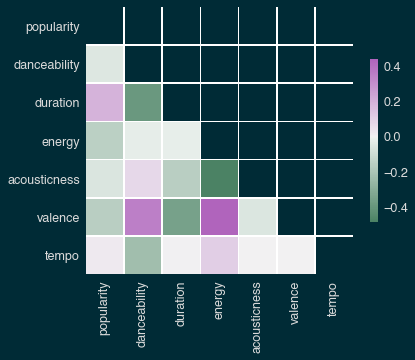

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = beatles_corr.corr()
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [10]:
solo = pd.read_csv('../data/band_solo_final.csv')

In [12]:
solo = solo.loc[solo.artist != 'The Beatles']

In [13]:
solo.artist.value_counts()

Ringo Starr        166
Paul McCartney     148
George Harrison    125
Wings               82
John Lennon         78
Yoko Ono            10
Name: artist, dtype: int64

In [14]:
solo = solo[['popularity','danceability','duration','energy','acousticness','valence','tempo']]

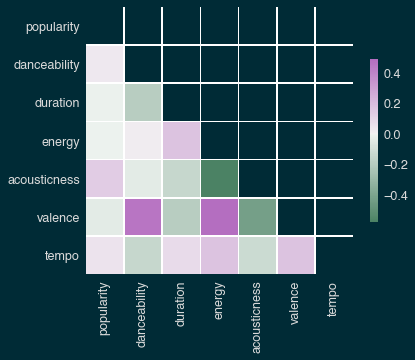

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = solo.corr()
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [21]:
peers = pd.read_csv('../data/band_peers_final.csv')

In [22]:
peers = peers.loc[peers.artist != 'The Beatles']

In [24]:
peers = peers[['popularity','danceability','duration','energy','acousticness','valence','tempo']]

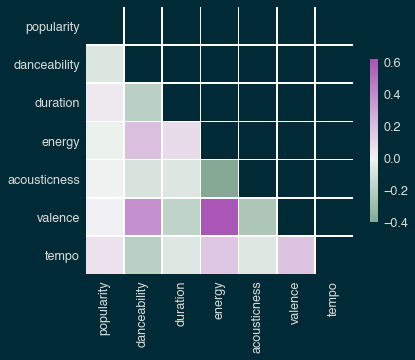

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = peers.corr()
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [27]:
release_date_corr = beatles_final[['popularity','danceability','duration','energy','acousticness','valence','tempo','release_date']]

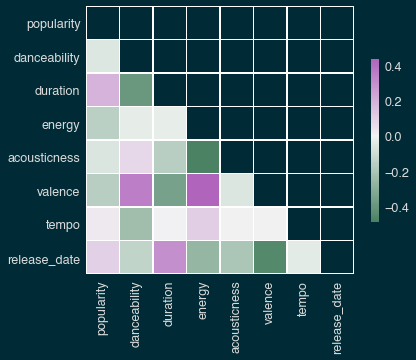

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = release_date_corr.corr()
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});